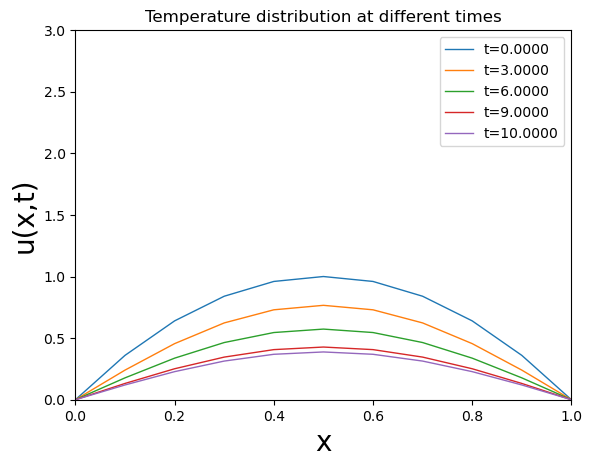

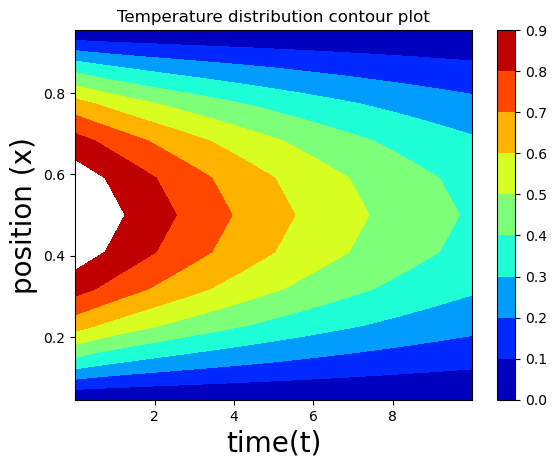

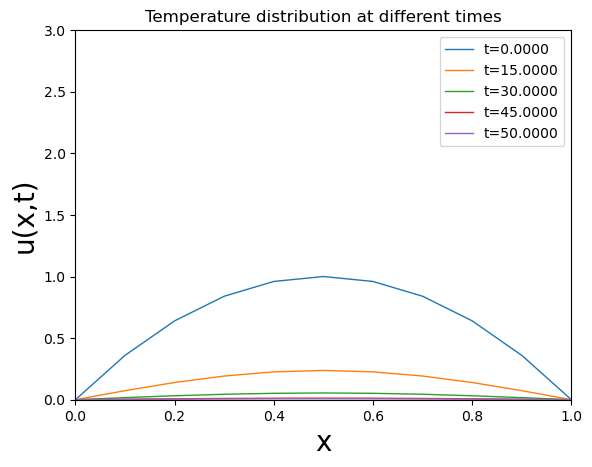

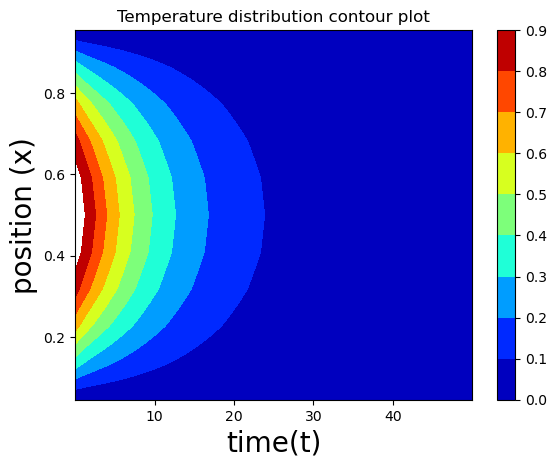

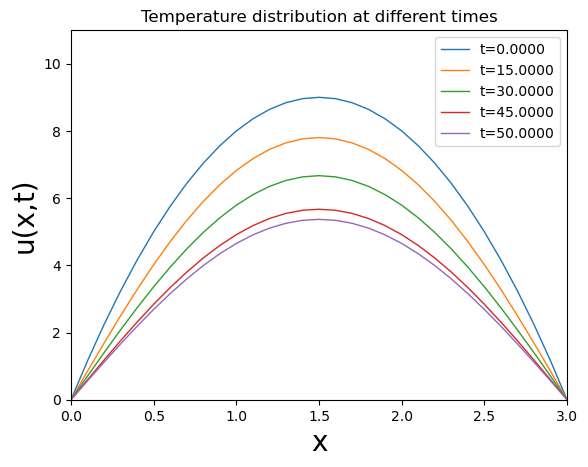

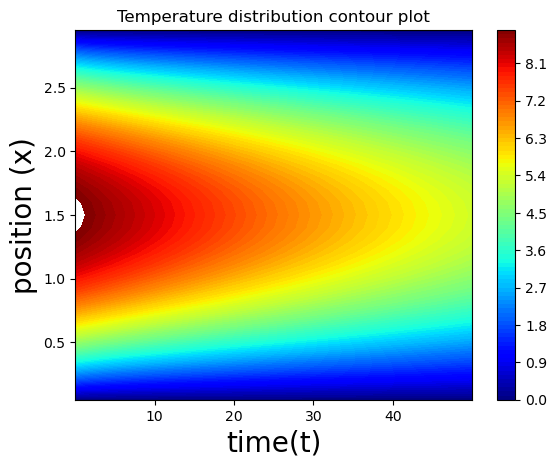

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

def solve_heat_equation():
    try:
        # 輸入初始條件
        L = float(entry_L.get())
        if not (1.0 <= L <= 3.0):
            raise ValueError("L 超出建議範圍！請輸入1.0到3.0之間的值。")

        T = float(entry_T.get())
        if not (10 <= T <= 50):
            raise ValueError("T 超出建議範圍！請輸入10到50之間的值。")

        dx = float(entry_dx.get())
        if not (0.05 <= dx <= 0.3):
            raise ValueError("dx 超出建議範圍！請輸入0.05到0.3之間的值。")

        dt = float(entry_dt.get())
        if not (0.001 <= dt <= 0.01):
            raise ValueError("dt 超出建議範圍！請輸入0.001到0.01之間的值。")

        R = float(entry_R.get())
        if not (1 <= R <= 10):
            raise ValueError("R 超出建議範圍！請輸入1.0到10之間的值。")

        N = int(L / dx) #位置節點數 = 長度/dx
        M = int(T / dt) #時間節點數 = 總時間/dt
        
        alpha = 0.01 #設定材料熱傳導係數
        A = alpha * dt / (dx**2) #熱傳導函數

        if dt > dx**2 / (2 * alpha):
            raise ValueError(" dt 不滿足數值穩定性條件，請減小 dt 或增大 dx。")

        U = np.zeros((N+1, M+1))# 初始化溫度

        #初始條件
        for i in range(N+1):
            U[i, 0] = R * i * dx * (L - i * dx)

        #邊界條件
        U[0, :] = 0
        U[N, :] = 0

        #帶入數值求解
        for k in range(M):
            for i in range(1, N):
                U[i, k+1] = A * U[i+1, k] + (1 - 2*A) * U[i, k] + A * U[i-1, k]

        time_indices = [0, int(M*0.3), int(M*0.6), int(M*0.9), M]
        x = np.linspace(0, L, N+1)

        # 繪製不同時間的溫度隨空間座標的變化
        plt.figure()
        for t in time_indices:
            plt.plot(x, U[:, t], label=f't={t*dt:.4f}', linewidth=1.0)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('u(x,t)', fontsize=20)
        plt.xlim(0, L)
        plt.ylim(np.min(U), np.max(U) + 2)
        plt.legend(loc='upper right')
        plt.title('Temperature distribution at different times')
        plt.show()

        # 繪製溫度等高線圖
        extent = [0, T, 0, L]
        levels = np.arange(np.min(U), np.max(U), 0.1)
        plt.contourf(U, levels, origin='lower', extent=extent, cmap=plt.cm.jet)
        plt.colorbar()
        plt.xlabel('time(t)', fontsize=20)
        plt.ylabel('position (x)', fontsize=20)
        plt.title('Temperature distribution contour plot')
        plt.show()

    #若有錯誤
    except ValueError as e:
        messagebox.showerror("ERROR", str(e))

#建立GUI
root = tk.Tk()
root.title("one-dimensional heat conduction problems")

#產生要輸入的項目
tk.Label(root, text="材料長度 L (建議 1.0 到 3.0):").grid(row=0)
entry_L = tk.Entry(root)
entry_L.grid(row=0, column=1)
entry_L.insert(0, "1.0")

tk.Label(root, text="總時間 T (建議 10 到 50):").grid(row=1)
entry_T = tk.Entry(root)
entry_T.grid(row=1, column=1)
entry_T.insert(0, "10")

tk.Label(root, text=" dx (建議 0.05 到 0.3):").grid(row=2)
entry_dx = tk.Entry(root)
entry_dx.grid(row=2, column=1)
entry_dx.insert(0, "0.1")

tk.Label(root, text=" dt (建議 0.001 到 0.01):").grid(row=3)
entry_dt = tk.Entry(root)
entry_dt.grid(row=3, column=1)
entry_dt.insert(0, "0.001")

tk.Label(root, text="初始條件常數 R (建議 1 到 10):").grid(row=4)
entry_R = tk.Entry(root)
entry_R.grid(row=4, column=1)
entry_R.insert(0, "4")

# 计算按钮
button = tk.Button(root, text="計算並繪圖", command=solve_heat_equation)
button.grid(row=5, columnspan=2)

root.mainloop()
